### Importación de librerías necesarias:

In [78]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

### Carga de datos desde los ficheros

In [79]:
client_test = pd.read_csv('client_test.csv')
client_train = pd.read_csv('client_train.csv')
invoice_test = pd.read_csv('invoice_test.csv')
invoice_train = pd.read_csv('invoice_train.csv')

Acceso a la siguiente información del dataset cargado:
- número total de columnas
- número total de filas
- numero de valores nulos
- tipo de datos de cada columna (en este caso objetct, float e int)

In [80]:
print('Info del dataset "client_test":\n')
client_test.info()
print('-------------------------------------------------')
print('\nInfo del dataset "client_train":\n')
client_train.info()
print('-------------------------------------------------')
print('\nInfo del dataset "invoice_test":\n')
invoice_test.info()
print('-------------------------------------------------')
print('\nInfo del dataset "invoice_train":\n')
invoice_train.info()

Info del dataset "client_test":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58069 entries, 0 to 58068
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   disrict        58069 non-null  int64 
 1   client_id      58069 non-null  object
 2   client_catg    58069 non-null  int64 
 3   region         58069 non-null  int64 
 4   creation_date  58069 non-null  object
dtypes: int64(3), object(2)
memory usage: 2.2+ MB
-------------------------------------------------

Info del dataset "client_train":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        135493 non-null  int64  
 1   client_id      135493 non-null  object 
 2   client_catg    135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object

Muestra de los 10 primeros registros de los dataset de entrenamiento:

In [81]:
client_train.head(n=10)

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0
5,69,train_Client_10000,11,103,29/09/1993,0.0
6,62,train_Client_100000,11,309,07/06/2012,0.0
7,60,train_Client_100001,11,101,12/04/2006,0.0
8,62,train_Client_100002,11,301,31/12/2006,0.0
9,60,train_Client_100003,11,101,25/10/2011,0.0


In [82]:
invoice_train.head(n=20)

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC
5,train_Client_0,2017-07-17,11,1335667,0,207,9,1,314,0,0,0,15638,15952,8,ELEC
6,train_Client_0,2018-12-07,11,1335667,0,207,9,1,541,0,0,0,15952,16493,12,ELEC
7,train_Client_0,2019-03-19,11,1335667,0,207,9,1,585,0,0,0,16493,17078,8,ELEC
8,train_Client_0,2011-07-22,11,1335667,0,203,9,1,1200,186,0,0,7770,9156,4,ELEC
9,train_Client_0,2011-11-22,11,1335667,0,203,6,1,1082,0,0,0,9156,10238,4,ELEC


Acceso al resumen estadístico de los dataset de entrenamiento:

In [83]:
client_train.describe()

,disrict,client_catg,region,target
count,135493.000000,135493.000000,135493.000000,135493.000000
mean,63.511222,11.512506,206.159809,0.055841
std,3.354400,4.423761,104.207044,0.229614
min,60.000000,11.000000,101.000000,0.000000
25%,62.000000,11.000000,103.000000,0.000000
50%,62.000000,11.000000,107.000000,0.000000
75%,69.000000,11.000000,307.000000,0.000000
max,69.000000,51.000000,399.000000,1.000000


In [84]:
invoice_train.describe()

,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
count,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06
mean,2.012804e+01,1.230587e+11,1.724884e+02,7.321702e+00,1.003040e+00,4.109795e+02,1.093225e+02,2.030620e+01,5.292588e+01,1.776700e+04,1.834970e+04,4.483095e+01
std,1.347256e+01,1.657267e+12,1.338871e+02,1.571654e+00,3.083466e-01,7.573080e+02,1.220123e+03,1.574239e+02,8.754725e+02,4.036693e+04,4.095321e+04,3.128335e+03
min,8.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.100000e+01,1.211080e+05,5.000000e+00,6.000000e+00,1.000000e+00,7.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.791000e+03,2.056000e+03,4.000000e+00
50%,1.100000e+01,4.945610e+05,2.030000e+02,8.000000e+00,1.000000e+00,2.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.690000e+03,8.192000e+03,4.000000e+00
75%,4.000000e+01,1.115161e+06,2.070000e+02,9.000000e+00,1.000000e+00,6.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.166000e+04,2.234300e+04,4.000000e+00
max,4.500000e+01,2.798115e+13,6.000000e+02,4.130000e+02,5.000000e+01,9.999100e+05,9.990730e+05,6.449200e+04,5.479460e+05,2.800280e+06,2.870972e+06,6.366240e+05


Máximo año del que se disponen datos de clientes

In [85]:
print(pd.to_datetime(client_train['creation_date']).max())
print(pd.to_datetime(client_train['creation_date']).min())

2019-09-10 00:00:00
1977-02-05 00:00:00


### Comprobación de valores nulos por columna en los dataset de entrenamiento
No hay valores nulos.

In [86]:
client_missing_values = client_train.isnull().sum()
print('Valores nulos dataset "client_train":')
print(client_missing_values)

Valores nulos dataset "client_train":
disrict          0
client_id        0
client_catg      0
region           0
creation_date    0
target           0
dtype: int64


In [87]:
invoice_missing_values = invoice_test.isnull().sum()
print('Valores nulos dataset "invoice_test":')
print(invoice_missing_values)

Valores nulos dataset "invoice_test":
client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64


### Análisis valores únicos del dataset de entrenamiento

In [88]:
for col in client_train.columns:
    print(f"{col} - {client_train[col].nunique()}")

disrict - 4
client_id - 135493
client_catg - 3
region - 25
creation_date - 8088
target - 2


In [89]:
for col in ['disrict', 'region', 'client_catg']:
    print('\nValores únicos variable ', col, ':', client_train[col].nunique())
    print(sorted(client_train[col].unique()))



Valores únicos variable  disrict : 4
[60, 62, 63, 69]

Valores únicos variable  region : 25
[101, 103, 104, 105, 106, 107, 199, 206, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 371, 372, 379, 399]

Valores únicos variable  client_catg : 3
[11, 12, 51]


In [90]:
#Obtener valores únicos en los datos del entrenamiento de facturas
for col in invoice_train.columns:
    print(f"{col} - {invoice_train[col].nunique()}")

client_id - 135493
invoice_date - 8275
tarif_type - 17
counter_number - 201893
counter_statue - 16
counter_code - 42
reading_remarque - 8
counter_coefficient - 16
consommation_level_1 - 8295
consommation_level_2 - 12576
consommation_level_3 - 2253
consommation_level_4 - 12075
old_index - 155648
new_index - 157980
months_number - 1370
counter_type - 2


In [91]:
for col in ['counter_type', 'counter_statue', 'tarif_type']:
    print('\nValores únicos en train de la variable "',col,'":', invoice_train[col].nunique())
    print(invoice_train[col].unique())


Valores únicos en train de la variable " counter_type ": 2
['ELEC' 'GAZ']

Valores únicos en train de la variable " counter_statue ": 16
[0 1 5 4 3 2 769 '0' '5' '1' '4' 'A' 618 269375 46 420]

Valores únicos en train de la variable " tarif_type ": 17
[11 40 15 10 12 14 13 45 29  9 30  8 21 42 27 18 24]


In [92]:
# Calcular el número de clientes únicos por cada valor de counter_statue
clients_counter_statue = invoice_train.groupby('counter_statue')['client_id'].nunique()

# Imprimir los resultados
print("Número de clientes únicos por cada valor posible de counter_statue:")
print(clients_counter_statue)

Número de clientes únicos por cada valor posible de counter_statue:
counter_statue
0         133366
1          34371
2             25
3             74
4            604
5          16874
46             1
420            1
618            1
769            1
269375         1
0           1002
1            257
4              5
5            127
A              1
Name: client_id, dtype: int64


In [93]:
for col in ['counter_type', 'counter_statue', 'tarif_type']:
    print('\nValores únicos en test de la variable "',col,'":', invoice_test[col].nunique())
    print(sorted(invoice_test[col].unique()))


Valores únicos en test de la variable " counter_type ": 2
['ELEC', 'GAZ']

Valores únicos en test de la variable " counter_statue ": 6
[0, 1, 2, 3, 4, 5]

Valores únicos en test de la variable " tarif_type ": 16
[8, 9, 10, 11, 12, 13, 14, 15, 21, 24, 27, 29, 30, 40, 42, 45]


### Distribución de los datos de entrenamiento

#### - Por la variable etiqueta
Valores posibles de "target": 0 - No Fraude, 1 - Fraude

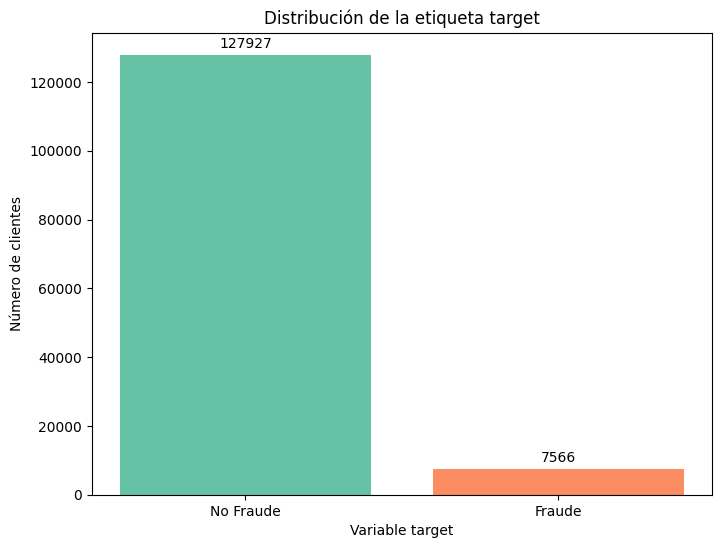

In [94]:
# Calcular la estadística de target
target_statistics = client_train.groupby(['target'])['client_id'].count()

plt.figure(figsize=(8, 6))

# Crear el gráfico de barras
plt.bar(x=target_statistics.index, 
        height=target_statistics.values,
        tick_label=['No Fraude', 'Fraude'], 
        color = ['#66c2a5', '#fc8d62'])

# Añadir etiquetas a las barras
for i, value in enumerate(target_statistics.values):
    plt.text(i, value + 1000, str(value), ha='center', va='bottom')
    
# Configura el título del gráfico
plt.title('Distribución de la etiqueta target')
plt.xlabel('Variable target')
plt.ylabel('Número de clientes')

# Muestra el gráfico
plt.show()


#### - Por las variables descriptivas

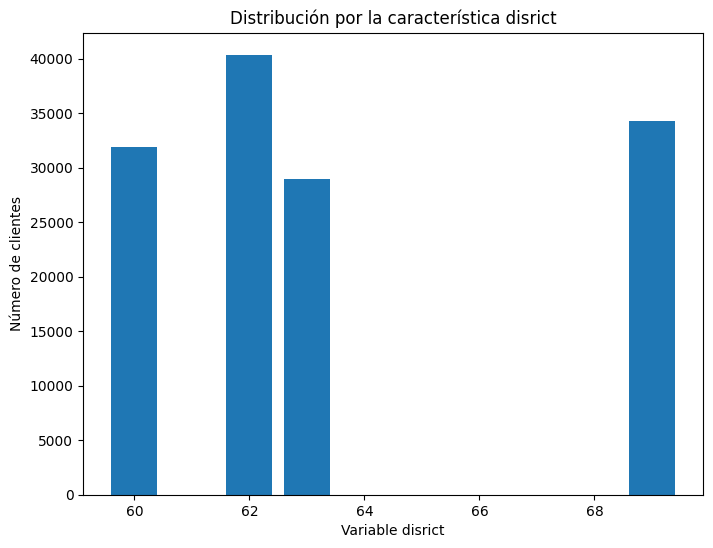

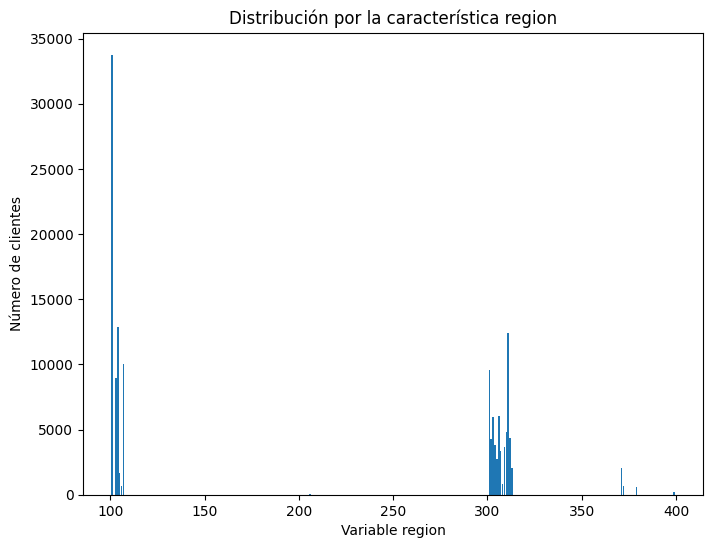

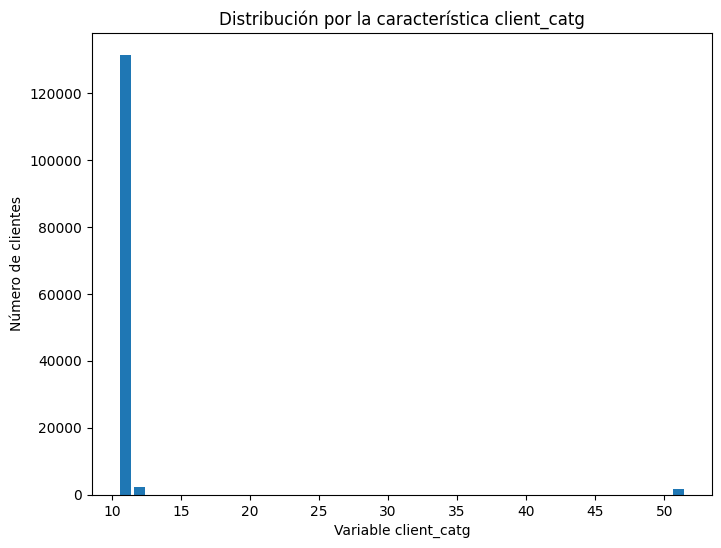

In [95]:
for col in ['disrict','region','client_catg']:
    distribution = client_train.groupby([col])['client_id'].count()
    
    plt.figure(figsize=(8, 6))
    
    plt.bar(x=distribution.index, 
            height=distribution.values)
    
    plt.title('Distribución por la característica '+ col)
    plt.xlabel('Variable ' + col)
    plt.ylabel('Número de clientes')

    plt.show()


In [96]:
# Fusionar los conjuntos de datos invoice y client en base a la columna client_id
merged_data = pd.merge(invoice_train, client_train[['client_id', 'target']], on='client_id', how='inner')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 17 columns):
 #   Column                Dtype  
---  ------                -----  
 0   client_id             object 
 1   invoice_date          object 
 2   tarif_type            int64  
 3   counter_number        int64  
 4   counter_statue        object 
 5   counter_code          int64  
 6   reading_remarque      int64  
 7   counter_coefficient   int64  
 8   consommation_level_1  int64  
 9   consommation_level_2  int64  
 10  consommation_level_3  int64  
 11  consommation_level_4  int64  
 12  old_index             int64  
 13  new_index             int64  
 14  months_number         int64  
 15  counter_type          object 
 16  target                float64
dtypes: float64(1), int64(12), object(4)
memory usage: 580.6+ MB


In [97]:
# Calcular el número de clientes únicos por cada combinación de reading_remarque y counter_type
unique_clients_by_remarque_counter_type = merged_data.groupby(['reading_remarque', 'target'])['client_id'].nunique()

# Mostrar el resultado
print(unique_clients_by_remarque_counter_type)


reading_remarque  target
5                 0.0            1
6                 0.0       112630
                  1.0         7151
7                 0.0          477
                  1.0            1
8                 0.0        88664
                  1.0         6927
9                 0.0       109170
                  1.0         7426
203               0.0            2
207               0.0            1
413               0.0            1
Name: client_id, dtype: int64


In [98]:
# Agrupar por la columna target y obtener los valores únicos de tarif_type para cada grupo
tarif_type_by_target = merged_data.groupby('target')['tarif_type'].unique()
# Imprimir los resultados
print("Tarif_type por target:")
print(tarif_type_by_target)


# Obtener los valores únicos de tarif_type
unique_tarif_types = merged_data['tarif_type'].unique()

# Imprimir los resultados
print("Valores únicos de tarif_type:")
print( sorted(unique_tarif_types))


Tarif_type por target:
target
0.0    [11, 40, 15, 10, 12, 14, 13, 45, 29, 9, 30, 8,...
1.0    [11, 40, 12, 14, 13, 10, 15, 9, 29, 45, 21, 18...
Name: tarif_type, dtype: object
Valores únicos de tarif_type:
[8, 9, 10, 11, 12, 13, 14, 15, 18, 21, 24, 27, 29, 30, 40, 42, 45]


In [99]:
# Obtener los valores únicos de tarif_type para target True
tarif_types_true = set(merged_data[merged_data['target'] == True]['tarif_type'].unique())

# Obtener los valores únicos de tarif_type para target False
tarif_types_false = set(merged_data[merged_data['target'] == False]['tarif_type'].unique())

# Encontrar los valores únicos de tarif_type que están en target True pero no en target False
tarif_types_only_true = tarif_types_true - tarif_types_false

# Imprimir los resultados
print("Valores de tarif_type presentes solo en target True:")
print(tarif_types_only_true)


# Filtrar el DataFrame para obtener solo los registros con target True y tarif_type igual a 18
filtered_data = merged_data[(merged_data['target'] == True) & (merged_data['tarif_type'] == 18)]

# Contar el número de clientes únicos
num_unique_clients = filtered_data['client_id'].nunique()

# Imprimir el resultado
print("Número de clientes únicos con target True y tarif_type igual a 18:", num_unique_clients)


Valores de tarif_type presentes solo en target True:
{18}
Número de clientes únicos con target True y tarif_type igual a 18: 1


### Correlación

In [100]:
# Seleccionar solo las columnas numéricas
numeric_columns2 = client_train.select_dtypes(include=['int64', 'float64'])

# Calcular la correlación entre las variables numéricas
correlation_matrix2 = numeric_columns2.corr()

# Calcular la correlación con una columna específica
correlation_with_target2 = correlation_matrix2['target']

# Ordenar la serie de correlación en orden descendente
correlation_with_target_sorted2 = correlation_with_target2.sort_values(ascending=False)

# Mostrar la correlación con la columna target ordenada en descendente
print(correlation_with_target_sorted2)


target         1.000000
client_catg    0.054745
disrict        0.050749
region         0.010940
Name: target, dtype: float64


In [101]:
# Seleccionar solo las columnas numéricas
numeric_columns = merged_data.select_dtypes(include=['int64', 'float64'])

# Calcular la correlación entre las variables numéricas
correlation_matrix = numeric_columns.corr()

# Calcular la correlación con una columna específica
correlation_with_target = correlation_matrix['target']

# Ordenar la serie de correlación en orden descendente
correlation_with_target_sorted = correlation_with_target.sort_values(ascending=False)

# Mostrar la correlación con la columna target ordenada en descendente
print(correlation_with_target_sorted)


target                  1.000000
new_index               0.028187
counter_number          0.028005
old_index               0.027519
consommation_level_3    0.023712
tarif_type              0.013382
consommation_level_4    0.013093
consommation_level_2    0.008421
months_number           0.006669
consommation_level_1    0.005514
reading_remarque        0.004768
counter_code           -0.002106
counter_coefficient    -0.002853
Name: target, dtype: float64


### Feature Engineering

In [102]:
invoice_train_order = invoice_train.sort_values(['client_id', 'invoice_date'])
invoice_test_order = invoice_test.sort_values(['client_id', 'invoice_date'])

#### - Feature transformation (*_1)

In [103]:
# Función que modifica tipos de datos
def feature_transformation (client, invoice):
    
    # Modificación a tipo de dato 'category'
    client['disrict'] = client['disrict'].astype('category')
    client['region'] = client['region'].astype('category')
    client['client_catg'] =client['client_catg'].astype('category')
    
    # Modificación a tipo de dato 'category'
    if 'target' in client.columns:
        # Convertir la columna 'target' a tipo booleano
        client['target'] =client['target'].astype(int)
    
    # Modificación a tipo de dato 'datatime'
    client['creation_date'] = pd.to_datetime(client['creation_date'], format='%d/%m/%Y')
    invoice['invoice_date'] = pd.to_datetime(invoice['invoice_date'], format='%Y-%m-%d')
     
    return client, invoice   

In [104]:
client_train_1, invoice_train_1 = feature_transformation(client_train, invoice_train_order)
client_test_1, invoice_test_1 = feature_transformation(client_test, invoice_test_order)

In [105]:
print('\nInfo del nuevo dataset "client_train_1":\n')
client_train_1.info()
print('-------------------------------------------------')
print('\nInfo del nuevo dataset "invoice_train_1":\n')
invoice_train_1.info()


Info del nuevo dataset "client_train_1":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   disrict        135493 non-null  category      
 1   client_id      135493 non-null  object        
 2   client_catg    135493 non-null  category      
 3   region         135493 non-null  category      
 4   creation_date  135493 non-null  datetime64[ns]
 5   target         135493 non-null  int32         
dtypes: category(3), datetime64[ns](1), int32(1), object(1)
memory usage: 3.0+ MB
-------------------------------------------------

Info del nuevo dataset "invoice_train_1":

<class 'pandas.core.frame.DataFrame'>
Index: 4476749 entries, 22 to 4476746
Data columns (total 16 columns):
 #   Column                Dtype         
---  ------                -----         
 0   client_id             object        
 1   invoice_date   

#### - Feature creation (*_2)

In [106]:
# Creación de nuevas características
def feature_creation (client, invoice):   

    # nueva variable 'region_group': agrupación de region
    client['region_group'] = client['region'].apply(lambda x: 100 if x<=100 else 300 if x>=300 else 200).astype('category')
    
    # nueva variable 'months_old': antigüedad en meses de cada cliente (¿calcular sobre 2019 o 2024?)
    client['months_old'] = (2019 - client['creation_date'].dt.year)*12 - client['creation_date'].dt.month
    
    # nueva variable 'variation_index' -> consommation
    invoice['consommation'] = invoice['new_index'] - invoice['old_index']
    
    # nueva variable 'variation_time': la diferencia de días entre las facturas para cada cliente y counter_type
    #invoice['variation_time'] = invoice.groupby(['client_id', 'counter_type'])['invoice_date'].diff().dt.days
    
    # nueva variable 'consommation': consommation total para cada fila y cada counter_type
    #invoice['consommation'] = invoice['consommation_level_1'] + invoice['consommation_level_2'] + invoice['consommation_level_3'] + invoice['consommation_level_4']
    
    # nueva variable 'consumption_per_month': consumo promedio por unidad de tiempo
    invoice['consumption_per_month'] = np.where(invoice['months_number'] == 0, 0, invoice['consommation'] / invoice['months_number'])
    
    return client, invoice

In [107]:
client_train_2, invoice_train_2 = feature_creation(client_train_1, invoice_train_1)
client_test_2, invoice_test_2 = feature_creation(client_test_1, invoice_test_1)

In [108]:
print('\nInfo del nuevo dataset "client_train_2":\n')
client_train_2.info()
print('-------------------------------------------------')
print('\nInfo del nuevo dataset "invoice_train_2":\n')
invoice_train_2.info()


Info del nuevo dataset "client_train_2":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   disrict        135493 non-null  category      
 1   client_id      135493 non-null  object        
 2   client_catg    135493 non-null  category      
 3   region         135493 non-null  category      
 4   creation_date  135493 non-null  datetime64[ns]
 5   target         135493 non-null  int32         
 6   region_group   135493 non-null  category      
 7   months_old     135493 non-null  int32         
dtypes: category(4), datetime64[ns](1), int32(2), object(1)
memory usage: 3.6+ MB
-------------------------------------------------

Info del nuevo dataset "invoice_train_2":

<class 'pandas.core.frame.DataFrame'>
Index: 4476749 entries, 22 to 4476746
Data columns (total 18 columns):
 #   Column                 Dtype         

In [109]:
client_train_2.head(n=10)

,disrict,client_id,client_catg,region,creation_date,target,region_group,months_old
0,60,train_Client_0,11,101,1994-12-31,0,200,288
1,69,train_Client_1,11,107,2002-05-29,0,200,199
2,62,train_Client_10,11,301,1986-03-13,0,300,393
3,69,train_Client_100,11,105,1996-07-11,0,200,269
4,62,train_Client_1000,11,303,2014-10-14,0,300,50
5,69,train_Client_10000,11,103,1993-09-29,0,200,303
6,62,train_Client_100000,11,309,2012-06-07,0,300,78
7,60,train_Client_100001,11,101,2006-04-12,0,200,152
8,62,train_Client_100002,11,301,2006-12-31,0,300,144
9,60,train_Client_100003,11,101,2011-10-25,0,200,86


In [110]:
invoice_train_2.head(n=10)

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,consommation,consumption_per_month
22,train_Client_0,2005-10-17,11,1335667,0,203,6,1,124,0,0,0,3685,3809,4,ELEC,124,31.00
23,train_Client_0,2006-02-24,11,1335667,0,203,6,1,141,0,0,0,3809,3950,4,ELEC,141,35.25
24,train_Client_0,2006-06-23,11,1335667,0,203,6,1,162,0,0,0,3950,4112,4,ELEC,162,40.50
25,train_Client_0,2006-10-18,11,1335667,0,203,6,1,159,0,0,0,4112,4271,4,ELEC,159,39.75
28,train_Client_0,2007-02-26,11,1335667,0,203,6,1,182,0,0,0,4271,4453,4,ELEC,182,45.50
26,train_Client_0,2007-06-27,11,1335667,0,203,6,1,240,0,0,0,4453,4693,4,ELEC,240,60.00
27,train_Client_0,2007-10-25,11,1335667,0,203,6,1,276,0,0,0,4693,4969,4,ELEC,276,69.00
34,train_Client_0,2008-01-04,11,1335667,0,203,6,1,277,0,0,0,4969,5246,4,ELEC,277,69.25
29,train_Client_0,2008-07-28,11,1335667,0,203,6,1,171,0,0,0,5246,5417,4,ELEC,171,42.75
10,train_Client_0,2008-11-25,11,1335667,0,203,6,1,174,0,0,0,5417,5591,4,ELEC,174,43.50


#### - Nuevo dataset (*_3)

In [111]:
def generate_dataset_new(client, invoice):
    
    # Obtener los valores únicos de 'counter_type'
    counter_types = invoice['counter_type'].unique()
    
    # Agrupar por 'client_id' y 'counter_type' y contar el número de filas por cliente y tipo de contador
    number_invoices = invoice.groupby(['client_id', 'counter_type']).size().reset_index(name='number_invoices')
    
    # Pivotar la tabla para tener columnas de 'number_invoices' por cada tipo de contador
    number_invoices_pivot = number_invoices.pivot_table(index='client_id', columns='counter_type', values='number_invoices', fill_value=0).reset_index()
    
    # Convertir las columnas a tipo entero
    number_invoices_pivot[counter_types] = number_invoices_pivot[counter_types].astype(int)
    
    # Renombrar las columnas de acuerdo a los valores únicos de 'counter_type'
    number_invoices_pivot.columns = ['client_id'] + ['number_invoices_' + counter_type for counter_type in counter_types]
    
    # Fusionar el resultado con el dataset 'client' por 'client_id'
    client = pd.merge(client, number_invoices_pivot, on='client_id', how='left')
    
    
    
    # Calcular el promedio y la desviación estándar de 'consommation' por 'client_id' y 'counter_type'
    mean_std_consommation = invoice.groupby(['client_id', 'counter_type'])['consommation'].agg(['mean', 'std']).unstack(fill_value=0).reset_index()
    
    # Renombrar las columnas de acuerdo a los valores únicos de 'counter_type'
    mean_std_consommation.columns = ['client_id'] + ['mean_consommation_' + counter_type for counter_type in counter_types] + ['std_consommation_' + counter_type for counter_type in counter_types]
    
    # Fusionar el resultado con el dataset 'client' por 'client_id'
    client = pd.merge(client, mean_std_consommation, on='client_id', how='left')
    
    
    
    # Calcular el promedio y la desviación estándar de 'consumption_rate' por 'client_id' y 'counter_type'
    mean_std_consumption_rate = invoice.groupby(['client_id', 'counter_type'])['consumption_per_month'].agg(['mean', 'std']).unstack(fill_value=0).reset_index()

    # Renombrar las columnas de acuerdo a los valores únicos de 'counter_type'
    mean_std_consumption_rate.columns = ['client_id'] + ['mean_consumption_per_month_' + counter_type for counter_type in counter_types] + ['std_consumption_per_month_' + counter_type for counter_type in counter_types]

    # Fusionar el resultado con el dataset 'client' por 'client_id'
    client = pd.merge(client, mean_std_consumption_rate, on='client_id', how='left')
    
    
    
    # Calcular el promedio y la desviación estándar de 'months_number' por 'client_id' y 'counter_type'
    mean_std_months_number = invoice.groupby(['client_id', 'counter_type'])['months_number'].agg(['mean', 'std']).unstack(fill_value=0).reset_index()
    
    # Renombrar las columnas de acuerdo a los valores únicos de 'counter_type'
    mean_std_months_number.columns = ['client_id'] + ['mean_months_number_' + counter_type for counter_type in counter_types] + ['std_months_number_' + counter_type for counter_type in counter_types]
    
    # Fusionar el resultado con el dataset 'client' por 'client_id'
    client = pd.merge(client, mean_std_months_number, on='client_id', how='left')
    
    
    
    # Establecer los valores faltantes en ciertas columnas a 0 porque al tener una sola facturación tienen NaN
    columns_to_fill_zero = client.filter(regex='std_consommation_|std_consumption_per_month_|std_months_number_').columns
    client[columns_to_fill_zero] = client[columns_to_fill_zero].fillna(0)
    
    return client


In [112]:
client_train_3 = generate_dataset_new(client_train_2, invoice_train_2)
client_test_3 = generate_dataset_new(client_test_2, invoice_test_2)

In [113]:
print('\nInfo del nuevo dataset "dataset_train":\n')
client_train_3.info()


Info del nuevo dataset "dataset_train":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 22 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   disrict                          135493 non-null  category      
 1   client_id                        135493 non-null  object        
 2   client_catg                      135493 non-null  category      
 3   region                           135493 non-null  category      
 4   creation_date                    135493 non-null  datetime64[ns]
 5   target                           135493 non-null  int32         
 6   region_group                     135493 non-null  category      
 7   months_old                       135493 non-null  int32         
 8   number_invoices_ELEC             135493 non-null  int32         
 9   number_invoices_GAZ              135493 non-null  int32         
 10  me

In [114]:
# Muestra los primero 10 registros
client_train_3.head(n=10)

,disrict,client_id,client_catg,region,creation_date,target,region_group,months_old,number_invoices_ELEC,number_invoices_GAZ,...,std_consommation_ELEC,std_consommation_GAZ,mean_consumption_per_month_ELEC,mean_consumption_per_month_GAZ,std_consumption_per_month_ELEC,std_consumption_per_month_GAZ,mean_months_number_ELEC,mean_months_number_GAZ,std_months_number_ELEC,std_months_number_GAZ
0,60,train_Client_0,11,101,1994-12-31,0,200,288,35,0,...,341.553930,0.000000,82.503571,0.000000,84.545640,0.000000,4.628571,0.000000,2.101620,0.000000
1,69,train_Client_1,11,107,2002-05-29,0,200,199,37,0,...,197.935960,0.000000,129.405405,0.000000,24.105605,0.000000,4.324324,0.000000,1.375461,0.000000
2,62,train_Client_10,11,301,1986-03-13,0,300,393,18,0,...,646.808386,0.000000,126.972222,0.000000,45.304153,0.000000,6.444444,0.000000,3.399346,0.000000
3,69,train_Client_100,11,105,1996-07-11,0,200,269,20,0,...,3.607011,0.000000,0.300000,0.000000,0.901753,0.000000,4.200000,0.000000,0.615587,0.000000
4,62,train_Client_1000,11,303,2014-10-14,0,300,50,14,0,...,633.485669,0.000000,237.910714,0.000000,150.969514,0.000000,3.714286,0.000000,0.726273,0.000000
5,69,train_Client_10000,11,103,1993-09-29,0,200,303,29,19,...,433.390662,259.190846,106.258621,66.109649,98.027668,68.716552,4.206897,3.684211,1.878056,1.002920
6,62,train_Client_100000,11,309,2012-06-07,0,300,78,20,20,...,367.968463,139.262824,128.531250,31.375000,89.536066,58.085492,3.800000,3.600000,1.281447,0.820783
7,60,train_Client_100001,11,101,2006-04-12,0,200,152,40,38,...,292.119618,59.176521,129.809375,31.059211,70.813247,18.547003,3.900000,3.842105,0.900142,0.546553
8,62,train_Client_100002,11,301,2006-12-31,0,300,144,2,0,...,149.199531,0.000000,28.125000,0.000000,37.299883,0.000000,4.000000,0.000000,0.000000,0.000000
9,60,train_Client_100003,11,101,2011-10-25,0,200,86,5,0,...,6750.877980,0.000000,1920.500000,0.000000,1687.719495,0.000000,4.000000,0.000000,0.000000,0.000000


In [115]:
# Muestra los últimos 10 registros 
client_train_3.tail(10)

,disrict,client_id,client_catg,region,creation_date,target,region_group,months_old,number_invoices_ELEC,number_invoices_GAZ,...,std_consommation_ELEC,std_consommation_GAZ,mean_consumption_per_month_ELEC,mean_consumption_per_month_GAZ,std_consumption_per_month_ELEC,std_consumption_per_month_GAZ,mean_months_number_ELEC,mean_months_number_GAZ,std_months_number_ELEC,std_months_number_GAZ
135483,62,train_Client_99990,11,303,2012-10-12,0,300,74,17,0,...,279.550506,0.000000,113.786765,0.000000,50.007417,0.000000,4.352941,0.000000,1.455214,0.000000
135484,63,train_Client_99991,11,311,2014-05-22,0,300,55,14,14,...,401.564967,59.962076,121.166667,19.258929,102.936817,15.339622,4.285714,4.285714,1.325987,1.325987
135485,60,train_Client_99992,11,101,2009-03-13,0,200,117,12,6,...,1050.027691,0.000000,127.918269,0.000000,64.996838,0.000000,7.500000,10.333333,6.829082,8.981462
135486,60,train_Client_99993,11,101,2006-11-17,0,200,145,25,10,...,358.559121,29.795600,167.605000,9.500000,78.021679,7.448900,4.080000,3.800000,0.909212,0.632456
135487,60,train_Client_99994,11,101,1978-12-12,0,200,480,4,0,...,12.922848,0.000000,2.656250,0.000000,3.359339,0.000000,6.000000,0.000000,2.309401,0.000000
135488,62,train_Client_99995,11,304,2004-07-26,0,300,173,37,34,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.378378,4.058824,1.319751,0.776206
135489,63,train_Client_99996,11,311,2012-10-25,0,300,74,20,21,...,226.889464,58.865869,77.812500,17.761905,56.722366,15.124582,4.000000,3.809524,0.000000,0.601585
135490,63,train_Client_99997,11,311,2011-11-22,0,300,85,22,14,...,164.270683,26.195063,95.142045,16.446429,19.071150,6.548766,4.181818,4.000000,0.852803,0.000000
135491,60,train_Client_99998,11,101,1993-12-22,0,200,300,2,0,...,232.638131,0.000000,59.187500,0.000000,10.871767,0.000000,6.000000,0.000000,2.828427,0.000000
135492,60,train_Client_99999,11,101,1986-02-18,0,200,394,3,0,...,178.864008,0.000000,114.833333,0.000000,44.716002,0.000000,4.000000,0.000000,0.000000,0.000000


In [116]:
# Seleccionar solo las columnas numéricas
numeric_columns3 = client_train_3.select_dtypes(include=['int32', 'float64', 'category'])

# Calcular la correlación entre las variables numéricas
correlation_matrix3 = numeric_columns3.corr()

# Calcular la correlación con una columna específica
correlation_with_target3 = correlation_matrix3['target']

# Ordenar la serie de correlación en orden descendente
correlation_with_target_sorted3 = correlation_with_target3.sort_values(ascending=False)

# Mostrar la correlación con la columna target ordenada en descendente
print(correlation_with_target_sorted3)


target                             1.000000
number_invoices_ELEC               0.127902
number_invoices_GAZ                0.088415
client_catg                        0.054745
months_old                         0.052246
disrict                            0.050749
mean_consumption_per_month_GAZ     0.042376
std_consommation_ELEC              0.031334
std_consumption_per_month_GAZ      0.028431
std_consommation_GAZ               0.027966
std_consumption_per_month_ELEC     0.019347
mean_consumption_per_month_ELEC    0.017041
mean_consommation_ELEC             0.012309
std_months_number_GAZ              0.011624
region                             0.010940
region_group                       0.008828
mean_consommation_GAZ              0.008279
mean_months_number_GAZ             0.003216
std_months_number_ELEC            -0.000438
mean_months_number_ELEC           -0.000966
Name: target, dtype: float64


In [117]:
# Verificar si hay algún dato faltante en el DataFrame
missing_values = client_train_3.isnull().any()

# Imprimir los resultados
print("Columnas con datos faltantes:")
print(missing_values)


Columnas con datos faltantes:
disrict                            False
client_id                          False
client_catg                        False
region                             False
creation_date                      False
target                             False
region_group                       False
months_old                         False
number_invoices_ELEC               False
number_invoices_GAZ                False
mean_consommation_ELEC             False
mean_consommation_GAZ              False
std_consommation_ELEC              False
std_consommation_GAZ               False
mean_consumption_per_month_ELEC    False
mean_consumption_per_month_GAZ     False
std_consumption_per_month_ELEC     False
std_consumption_per_month_GAZ      False
mean_months_number_ELEC            False
mean_months_number_GAZ             False
std_months_number_ELEC             False
std_months_number_GAZ              False
dtype: bool


#### - Dataset final (*_4)

In [118]:
# Eliminar las variables 'client_id' y 'creation_date', ya que son variables innecesarias para predecir si es fraudulento o no
def drop_columns (dataset):

    col_drop = ['client_id', 'creation_date']
    for col in col_drop:
        dataset = dataset.drop([col], axis=1)
        
    return dataset

In [119]:
client_train_4_ = client_train_3
client_train_4_drop = drop_columns(client_train_3)

client_test_4 = client_test_3
client_test_4_drop = drop_columns(client_test_3)

In [120]:
client_train_4_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype   
---  ------                           --------------   -----   
 0   disrict                          135493 non-null  category
 1   client_catg                      135493 non-null  category
 2   region                           135493 non-null  category
 3   target                           135493 non-null  int32   
 4   region_group                     135493 non-null  category
 5   months_old                       135493 non-null  int32   
 6   number_invoices_ELEC             135493 non-null  int32   
 7   number_invoices_GAZ              135493 non-null  int32   
 8   mean_consommation_ELEC           135493 non-null  float64 
 9   mean_consommation_GAZ            135493 non-null  float64 
 10  std_consommation_ELEC            135493 non-null  float64 
 11  std_consommation_GAZ             135493 non-null  fl

# Dataset a usar

In [121]:
# Especificar dataset a usar
dataset_train_use = client_train_4_drop
dataset_test_use = client_test_4

In [122]:
dataset_train_use.describe()

,target,months_old,number_invoices_ELEC,number_invoices_GAZ,mean_consommation_ELEC,mean_consommation_GAZ,std_consommation_ELEC,std_consommation_GAZ,mean_consumption_per_month_ELEC,mean_consumption_per_month_GAZ,std_consumption_per_month_ELEC,std_consumption_per_month_GAZ,mean_months_number_ELEC,mean_months_number_GAZ,std_months_number_ELEC,std_months_number_GAZ
count,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000
mean,0.055841,194.518853,22.727418,10.313027,716.266083,99.347471,747.925881,95.836619,177.437938,21.077029,182.154393,23.044299,18.880780,20.385730,6.449208,6.689147
std,0.229614,138.515073,16.182457,14.082244,2736.040569,2198.073992,3493.491908,920.920464,871.539449,101.975884,1693.148507,235.579356,1840.021180,2197.955243,526.702889,757.245572
min,0.000000,-9.000000,0.000000,0.000000,-498591.500000,-90011.000000,0.000000,0.000000,-249534.875000,-15298.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,80.000000,9.000000,0.000000,282.500000,0.000000,160.783024,0.000000,65.057692,0.000000,30.503929,0.000000,4.000000,0.000000,0.640513,0.000000
50%,0.000000,159.000000,23.000000,0.000000,489.400000,0.000000,302.308174,0.000000,112.104730,0.000000,57.244132,0.000000,4.200000,0.000000,1.202239,0.000000
75%,0.000000,299.000000,35.000000,21.000000,785.677419,95.648649,552.574940,61.576317,177.932489,22.728571,103.904310,13.172005,4.666667,4.090909,1.963374,1.055389
max,1.000000,502.000000,439.000000,158.000000,470540.000000,596828.687500,707820.251929,161639.238097,67044.770833,5631.966216,353571.952146,40604.419083,472737.000000,602244.750000,99775.824302,166779.169080


In [123]:
dataset_test_use.describe()

,creation_date,months_old,number_invoices_ELEC,number_invoices_GAZ,mean_consommation_ELEC,mean_consommation_GAZ,std_consommation_ELEC,std_consommation_GAZ,mean_consumption_per_month_ELEC,mean_consumption_per_month_GAZ,std_consumption_per_month_ELEC,std_consumption_per_month_GAZ,mean_months_number_ELEC,mean_months_number_GAZ,std_months_number_ELEC,std_months_number_GAZ
count,58069,58069.000000,58069.000000,58069.000000,58069.000000,58069.000000,58069.000000,58069.000000,58069.000000,58069.000000,58069.000000,58069.000000,58069.000000,58069.000000,58069.000000,58069.000000
mean,2002-08-31 01:25:57.009764224,195.560471,23.003565,10.400317,704.596210,111.322190,791.924790,109.908849,171.477365,22.453643,202.924293,24.432753,28.782614,29.563506,13.546549,14.176091
min,1977-02-05 00:00:00,-8.000000,0.000000,0.000000,-499205.500000,-15003.166667,0.000000,0.000000,-249602.750000,-3725.708333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1993-12-20 00:00:00,81.000000,9.000000,0.000000,286.564103,0.000000,164.263001,0.000000,66.083333,0.000000,30.977784,0.000000,4.000000,0.000000,0.646670,0.000000
50%,2005-06-10 00:00:00,162.000000,23.000000,0.000000,493.571429,0.000000,303.176252,0.000000,113.558333,0.000000,57.831968,0.000000,4.200000,0.000000,1.202239,0.000000
75%,2012-03-02 00:00:00,300.000000,35.000000,21.000000,787.000000,96.421053,555.416052,62.465635,179.150641,23.025000,105.397277,13.399275,4.666667,4.095238,1.960964,1.060660
max,2019-08-26 00:00:00,502.000000,301.000000,142.000000,512837.430233,463123.500000,707140.015205,292725.454128,33103.976636,6403.735714,353570.007603,15025.540367,524338.616279,469235.550000,323932.280558,298768.029526
std,NaN,138.551334,16.692818,14.239287,4251.556010,2760.851367,5208.820074,1724.236415,1368.494885,111.467876,2545.779414,227.045114,3103.408577,2781.324431,1675.423225,1601.385815


# Normalizar el dataset

In [ ]:
#dataset_train_normalize = normalize_dataset (dataset_train_use)

In [ ]:
#dataset_test_normalize = normalize_dataset (dataset_test_use.drop(columns=['creation_date']))

In [ ]:
#dataset_train_normalize.describe()

# Estudio de algortimos a aplicar

### Cáculo de PCA

In [124]:
from sklearn.decomposition import PCA

# Inicializar PCA con todas las componentes
pca = PCA(random_state=42)

# Ajustar PCA al conjunto de entrenamiento
pca.fit(dataset_train_use)

# Calcular la varianza explicada acumulada
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Encontrar el número de componentes que explican al menos el 80% de la varianza
n_components_95_variance = np.argmax(explained_variance_ratio_cumulative >= 0.95) + 1

print("Número de componentes para el 95% de varianza explicada:", n_components_95_variance)


Número de componentes para el 95% de varianza explicada: 5


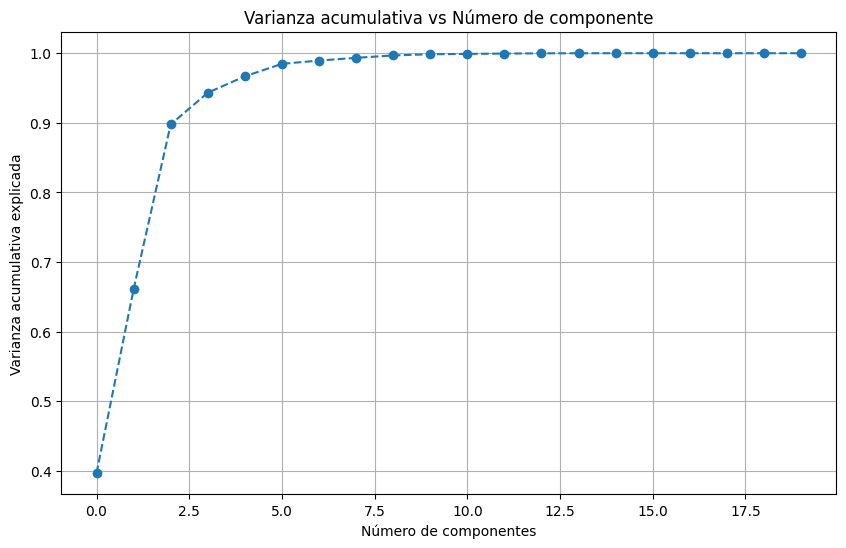

In [125]:
# Gráfica de la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(explained_variance_ratio_cumulative, marker='o', linestyle='--')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulativa explicada')
plt.title('Varianza acumulativa vs Número de componente')
plt.grid(True)
plt.show()

### Partición de datos

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [127]:
# Eliminar la columna 'target' del conjunto de datos de entrenamiento
X_train = dataset_train_use.drop('target', axis=1)

# Separar las etiquetas del conjunto de datos de entrenamiento
y_train = dataset_train_use['target']

#### - Con PCA

In [128]:
# Inicializar PCA con el número de componentes que deseas
pca2 = PCA(n_components=n_components_95_variance, random_state=42)

# Ajustar PCA al conjunto de entrenamiento
pca2.fit(X_train)

# Transformar los conjuntos de entrenamiento utilizando PCA
X_train_pca = pca2.transform(X_train)

# Escalar características del conjunto de datos de entrenamiento transformado
scaler1 = StandardScaler()
X_train_scaled1 = scaler1.fit_transform(X_train_pca)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_split1, X_test_split1, y_train_split1, y_test_split1 = train_test_split(X_train_scaled1, y_train, test_size=0.2, random_state=42)


#### - Sin PCA

In [129]:
# Escalar características del conjunto de datos de entrenamiento
scaler2 = StandardScaler()
X_train_scaled2 = scaler2.fit_transform(X_train)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_split2, X_test_split2, y_train_split2, y_test_split2 = train_test_split(X_train_scaled2, y_train, test_size=0.2, random_state=42)

#### - Partición a a usar

In [130]:
# definir qué conjunto de datos usar
X_train_use = X_train_split2
X_test_use = X_test_split2
y_train_use = y_train_split2
y_test_use = y_test_split2

### Algotirmo LogisticRegression

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Inicializar y entrenar el modelo de regresión logística
logistic_model = LogisticRegression(random_state=42, class_weight='balanced')  # Utilizando ponderación de clases
logistic_model.fit(X_train_use, y_train_use)

# Hacer predicciones sobre el conjunto de datos de prueba
y_pred_proba_test_weighted = logistic_model.predict_proba(X_test_use)[:, 1]

# Convertir probabilidades en etiquetas binarias usando un umbral de decisión de 0.5
y_pred_test_weighted_binary = (y_pred_proba_test_weighted >= 0.5).astype(int)

# Evaluar el modelo en el conjunto de datos de prueba
print("AUC ROC:", roc_auc_score(y_test_use, y_pred_proba_test_weighted))
print(classification_report(y_test_use, y_pred_test_weighted_binary))


AUC ROC: 0.7009464718452232
              precision    recall  f1-score   support

           0       0.97      0.62      0.75     25535
           1       0.09      0.66      0.17      1564

    accuracy                           0.62     27099
   macro avg       0.53      0.64      0.46     27099
weighted avg       0.92      0.62      0.72     27099



### Algotirmo RandomForestClassifier

#### - Sin hiperparámetros

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Inicializar el clasificador Random Forest
rf_classifier1 = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el clasificador
rf_classifier1.fit(X_train_use, y_train_use)

# Hacer predicciones sobre el conjunto de prueba
y_pred1 = rf_classifier1.predict(X_test_use)
y_pred_proba1 = rf_classifier1.predict_proba(X_test_use)[:, 1]

# Evaluar el modelo
print("AUC ROC:", roc_auc_score(y_test_use, y_pred_proba1))
print(classification_report(y_test_use, y_pred1))


AUC ROC: 0.7508372991886668
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     25535
           1       0.25      0.00      0.00      1564

    accuracy                           0.94     27099
   macro avg       0.60      0.50      0.49     27099
weighted avg       0.90      0.94      0.91     27099



#### - Con hiperparámetros (TARDA EN EJECUTARSE - NO COMPROBADO)

### Gradient Boosting Classifier

In [133]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Inicializar el modelo Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Entrenar el modelo
gb_classifier.fit(X_train_use, y_train_use)

# Realizar predicciones en el conjunto de prueba
y_pred_proba_gb = gb_classifier.predict_proba(X_test_use)[:, 1]

# Evaluar el modelo
print("AUC ROC:", roc_auc_score(y_test_use, y_pred_proba_gb))
print(classification_report(y_test_use, (y_pred_proba_gb >= 0.5).astype(int)))


AUC ROC: 0.7725553963593422
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     25535
           1       0.00      0.00      0.00      1564

    accuracy                           0.94     27099
   macro avg       0.47      0.50      0.49     27099
weighted avg       0.89      0.94      0.91     27099



### Gradient Boosting Classifier y GridSearchCV

Como requiere de mucha memoria se crea un dataset más pequeño y equilibrado de 6000 registros (3000 fraude y 3000 no fraude)

In [135]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report

# Identificar las clases de la variable objetivo
clases = dataset_train_use['target'].unique()

# Calcular el tamaño de la muestra para cada clase (asumiendo que deseas el mismo tamaño para todas las clases)
tamaño_muestra_por_clase = 7566  # Ajusta según sea necesario

# Inicializar un DataFrame vacío para almacenar la muestra equilibrada
dataset_train_sample = pd.DataFrame()

# Obtener una muestra equilibrada de cada clase
for clase in clases:
    clase_muestra = dataset_train_use[dataset_train_use['target'] == clase].sample(n=tamaño_muestra_por_clase, random_state=42)
    dataset_train_sample = pd.concat([dataset_train_sample, clase_muestra])

# Aleatorizar el orden de las filas en la muestra resultante
dataset_train_sample = dataset_train_sample.sample(frac=1, random_state=42).reset_index(drop=True)

# Eliminar la columna 'target' del conjunto de datos de entrenamiento
X_train_sample = dataset_train_sample.drop('target', axis=1)
y_train_sample = dataset_train_sample['target']

# Escalar características del conjunto de datos de entrenamiento
scaler_sample = StandardScaler()
X_train_sample_scaled = scaler_sample.fit_transform(X_train_sample)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_split_sample, X_test_split_sample, y_train_split_sample, y_test_split_sample = train_test_split(X_train_sample_scaled, y_train_sample, test_size=0.2, random_state=42)


In [136]:
print('\nInfo del dataset "X_train_sample":\n')
X_train_sample.info()


Info del dataset "X_train_sample":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15132 entries, 0 to 15131
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   disrict                          15132 non-null  category
 1   client_catg                      15132 non-null  category
 2   region                           15132 non-null  category
 3   region_group                     15132 non-null  category
 4   months_old                       15132 non-null  int32   
 5   number_invoices_ELEC             15132 non-null  int32   
 6   number_invoices_GAZ              15132 non-null  int32   
 7   mean_consommation_ELEC           15132 non-null  float64 
 8   mean_consommation_GAZ            15132 non-null  float64 
 9   std_consommation_ELEC            15132 non-null  float64 
 10  std_consommation_GAZ             15132 non-null  float64 
 11  mean_consumption_per_month_ELE

In [137]:
# Definir el rango de hiperparámetros a explorar
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
}

# Inicializar el clasificador Gradient Boosting
gb_classifier2 = GradientBoostingClassifier(random_state=42)

# Inicializar la búsqueda grid con validación cruzada de 5 folds
grid_search2 = GridSearchCV(gb_classifier2, param_grid_gb, cv=5, scoring='roc_auc')

# Ajustar la búsqueda grid al conjunto de datos de entrenamiento
grid_search2.fit(X_train_sample_scaled, y_train_sample)

# Obtener los mejores hiperparámetros encontrados
best_params_gb = grid_search2.best_params_
print("Mejores hiperparámetros:", best_params_gb)

# Obtener el mejor modelo encontrado
best_gb_model = grid_search2.best_estimator_

# Predecir las probabilidades en el conjunto de datos de prueba
y_pred_proba_test_gb = best_gb_model.predict_proba(X_test_split_sample)[:, 1]

Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}


Umbral óptimo: 0.5069512993961933


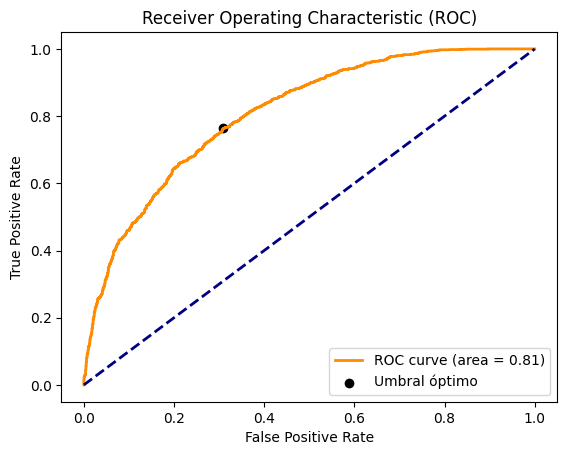

In [138]:
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, auc


# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_split_sample, y_pred_proba_test_gb)

# Calcular el AUC-ROC
roc_auc = auc(fpr, tpr)

# Encontrar el umbral óptimo
optimal_threshold_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_threshold_index]

print("Umbral óptimo:", optimal_threshold)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], marker='o', color='black', label='Umbral óptimo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [139]:
# Ajustar las predicciones del modelo utilizando el umbral óptimo
y_pred_optimized = (y_pred_proba_test_gb >= optimal_threshold).astype(int)

# Evaluar el modelo con el umbral optimizado
print("AUC ROC:", roc_auc_score(y_test_split_sample, y_pred_proba_test_gb))
print(classification_report(y_test_split_sample, y_pred_optimized))

AUC ROC: 0.8080664412261103
              precision    recall  f1-score   support

           0       0.74      0.69      0.72      1506
           1       0.71      0.76      0.74      1521

    accuracy                           0.73      3027
   macro avg       0.73      0.73      0.73      3027
weighted avg       0.73      0.73      0.73      3027



In [140]:
dataset_test_usetrain = client_train_4_
dataset_test_usetrain_drop = client_train_4_drop

In [141]:
# Predicciones en conjunto de clientes
# Escalar características del conjunto de datos de clientes (si es necesario)
X_clientes_scaled = scaler_sample.transform(dataset_test_usetrain_drop.drop(columns=['target']))

# Predecir las probabilidades de fraude para los clientes en el conjunto de datos de clientes
probabilidades_fraude_clientes = best_gb_model.predict_proba(X_clientes_scaled)[:, 1]

# Ajustar las predicciones del modelo utilizando el umbral óptimo
y_pred_optimized_fraude_clientes = (probabilidades_fraude_clientes >= optimal_threshold).astype(int)

# Agregar las probabilidades de fraude como una nueva columna en el DataFrame 'clientes'
dataset_test_usetrain['probabilidad_fraude'] = probabilidades_fraude_clientes
dataset_test_usetrain['prediccion_fraude'] = y_pred_optimized_fraude_clientes

# Seleccionar las columnas requeridas para exportar
export_data = dataset_test_usetrain[['client_id', 'target', 'probabilidad_fraude', 'prediccion_fraude']]
export_data.head(n=10)

,client_id,target,probabilidad_fraude,prediccion_fraude
0,train_Client_0,0,0.500770,0
1,train_Client_1,0,0.254733,0
2,train_Client_10,0,0.376609,0
3,train_Client_100,0,0.110149,0
4,train_Client_1000,0,0.400430,0
5,train_Client_10000,0,0.780327,1
6,train_Client_100000,0,0.449566,0
7,train_Client_100001,0,0.482072,0
8,train_Client_100002,0,0.030245,0
9,train_Client_100003,0,0.324592,0


In [145]:
#Exportar los datos filtrados a un archivo Excel
export_data.to_excel('probabilidad_train2.xlsx', index=False)

In [142]:
dataset_test_usetest = client_test_4
dataset_test_usetest_drop = client_test_4_drop

In [143]:
# Predicciones en conjunto de clientes2
# Escalar características del conjunto de datos de clientes (si es necesario)
X_clientes_scaled2 = scaler_sample.transform(dataset_test_usetest_drop)

# Predecir las probabilidades de fraude para los clientes en el conjunto de datos de clientes
probabilidades_fraude_clientes2 = best_gb_model.predict_proba(X_clientes_scaled2)[:, 1]
# Ajustar las predicciones del modelo utilizando el umbral óptimo
y_pred_optimized_fraude_clientes2 = (probabilidades_fraude_clientes2 >= optimal_threshold).astype(int)

# Agregar las probabilidades de fraude como una nueva columna en el DataFrame 'clientes'
dataset_test_usetest['probabilidad_fraude'] = probabilidades_fraude_clientes2
dataset_test_usetest['prediccion_fraude'] = y_pred_optimized_fraude_clientes2

# Seleccionar las columnas requeridas para exportar
export_data2 = dataset_test_usetest[['client_id', 'probabilidad_fraude', 'prediccion_fraude']]
export_data2.head(n=10)

,client_id,probabilidad_fraude,prediccion_fraude
0,test_Client_0,0.500068,0
1,test_Client_1,0.789030,1
2,test_Client_10,0.369176,0
3,test_Client_100,0.308049,0
4,test_Client_1000,0.493309,0
5,test_Client_10000,0.577549,1
6,test_Client_10001,0.351897,0
7,test_Client_10002,0.843249,1
8,test_Client_10003,0.263197,0
9,test_Client_10004,0.394412,0


In [146]:
#Exportar los datos filtrados a un archivo Excel
export_data2.to_excel('probabilidad_test2.xlsx', index=False)

Entrenamiento por trozos (PENDIENTE VALIDAR)

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, classification_report

# Especifica el tamaño deseado de cada trozo
chunk_size = 2500

# Calcula el número total de trozos necesarios
num_chunks = len(X_train_use) // chunk_size + 1

# Divide el conjunto de datos de entrenamiento en trozos más pequeños
data_chunks = np.array_split(X_train_use, num_chunks)
target_chunks = np.array_split(y_train_use, num_chunks)

# Inicializar el clasificador Gradient Boosting
gb_classifier = GradientBoostingClassifier(random_state=42)

# Definir el rango de hiperparámetros a explorar
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
}

# Inicializar la búsqueda grid con validación cruzada de 5 folds
grid_search = GridSearchCV(gb_classifier, param_grid_gb, cv=5, scoring='roc_auc')

# Lista para almacenar los modelos entrenados
trained_models = []

# Iterar sobre los trozos de datos
for i in range(0, len(data_chunks)):
    # Obtener el trozo de datos actual
    current_chunk = data_chunks[i]
    current_target_chunk = target_chunks[i]
    
    # Entrenar el modelo en el trozo actual
    grid_search.fit(current_chunk, current_target_chunk)
    
    # Guardar el modelo entrenado
    trained_models.append(grid_search.best_estimator_)

# Obtener las probabilidades predichas en el conjunto de datos de prueba
y_pred_probas = np.mean([model.predict_proba(X_test_use)[:, 1] for model in trained_models], axis=0)

# Ajustar el umbral de decisión para mejorar el recall si es necesario
threshold = 0.5091303752086989  # Ajustar el umbral según se necesite
y_pred = (y_pred_probas >= threshold).astype(int)

# Evaluar el modelo en el conjunto de datos de prueba
print("AUC ROC en el conjunto de datos de prueba:", roc_auc_score(y_test_use, y_pred_probas))
print("Reporte de clasificación en el conjunto de datos de prueba:")
print(classification_report(y_test_use, y_pred))


AUC ROC en el conjunto de datos de prueba: 0.7564516032104773
Reporte de clasificación en el conjunto de datos de prueba:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     25535
           1       0.00      0.00      0.00      1564

    accuracy                           0.94     27099
   macro avg       0.47      0.50      0.49     27099
weighted avg       0.89      0.94      0.91     27099

